<a href="https://colab.research.google.com/github/saymrwulf/timeseries/blob/main/Yahoo_Finance_and_neural_forecasting_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This tutorial dives into the intersection of financial data and AI, demonstrating how you can harness the power of Python libraries like yfinance and NeuralForecasting to transform raw stock market data into actionable forecasts.

What We'll Cover:

* We'll start by utilizing yfinance, a powerful tool for downloading historical stock prices and fundamental financial data directly from Yahoo Finance.
* You'll learn how to clean, transform, and structure your financial data to make it AI-ready, setting the stage for model training.
* We'll introduce you to the intuitive NeuralForecasting library, a specialized toolkit designed to streamline the creation of time series forecasting models using neural networks.
* We'll guide you through building and training a neural network model to predict stock prices, showcasing the synergy between financial domain knowledge and AI techniques.


# Prerequisites
But before we start, we need to install the prerequisites.

In [21]:
!pip install yfinance neuralforecast

# Financial data with Yahoo Finance

In [22]:
import yfinance as yf
data = yf.download("AAPL", start="2015-01-01", end="2023-06-30")
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.347172,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.661272,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.663498,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.995317,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.917269,27.972500,28.037500,27.174999,27.307501,237458000
...,...,...,...,...,...,...
2023-06-23,185.275299,186.679993,187.559998,185.009995,185.550003,53079300
2023-06-26,183.875916,185.270004,188.050003,185.229996,186.830002,48088700


In [23]:
import yfinance as yf
aapl = yf.Ticker('AAPL')
aapl.balance_sheet

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Treasury Shares Number,NaN,0.0,NaN,NaN,NaN
Ordinary Shares Number,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Share Issued,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Net Debt,76686000000.0,81123000000.0,96423000000.0,89779000000.0,NaN
Total Debt,106629000000.0,111088000000.0,132480000000.0,136522000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,65171000000.0,61555000000.0,48304000000.0,62639000000.0,NaN
Other Short Term Investments,35228000000.0,31590000000.0,24658000000.0,27699000000.0,NaN
Cash And Cash Equivalents,29943000000.0,29965000000.0,23646000000.0,34940000000.0,NaN
Cash Equivalents,2744000000.0,1606000000.0,5100000000.0,17635000000.0,NaN


In [24]:
import yfinance as yf
import pandas as pd


# Fetch data for multiple tickers
tickers = ["AAPL", "GOOG", "MSFT"]
data = yf.download(tickers, start="2015-01-01", end="2023-06-30")

# Reshape the data
df = data['Close']  # No need to unstack here

# Convert the Series to a DataFrame if it's not already (optional but recommended)
if isinstance(df, pd.Series):
    df = df.to_frame()

# Melt the dataframe to long format
hist = df.melt(ignore_index=False, var_name='Ticker', value_name='Close')
hist.reset_index(inplace=True)


print(hist)

[*********************100%***********************]  3 of 3 completed

           Date Ticker       Close
0    2015-01-02   AAPL   27.332500
1    2015-01-05   AAPL   26.562500
2    2015-01-06   AAPL   26.565001
3    2015-01-07   AAPL   26.937500
4    2015-01-08   AAPL   27.972500
...         ...    ...         ...
6406 2023-06-23   MSFT  335.019989
6407 2023-06-26   MSFT  328.600006
6408 2023-06-27   MSFT  334.570007
6409 2023-06-28   MSFT  335.850006
6410 2023-06-29   MSFT  335.049988

[6411 rows x 3 columns]


# Preparing the time-series data


In [25]:
import pandas as pd

from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS

In [26]:
hist.rename(columns={'Date': 'ds', 'Ticker': 'unique_id', 'Close':'y'}, inplace=True)
hist.head()

,ds,unique_id,y
0,2015-01-02,AAPL,27.332500
1,2015-01-05,AAPL,26.562500
2,2015-01-06,AAPL,26.565001
3,2015-01-07,AAPL,26.937500
4,2015-01-08,AAPL,27.972500


In [27]:
horizon = 12

# Try different hyperparmeters to improve accuracy.
models = [NHITS(h=horizon,                      # Forecast horizon
                input_size=2 * horizon,         # Length of input sequence
                max_steps=1000,                 # Number of steps to train
                n_freq_downsample=[2, 1, 1],    # Downsampling factors for each stack output
                mlp_units = 3 * [[1024, 1024]]) # Number of units in each block.
          ]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=hist, val_size=horizon)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 9.6 M  | train
-------------------------------------------------------
9.6 M     Trainable params
0         Non-trainable params
9.6 M     Total params
38.413    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


In [28]:
Y_hat_insample = nf.predict_insample(step_size=horizon)

/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [29]:
Y_hat_insample.head()

,unique_id,ds,cutoff,NHITS,y
0,AAPL,2015-01-05,2014-12-31,-0.121156,26.562500
1,AAPL,2015-01-06,2014-12-31,0.044257,26.565001
2,AAPL,2015-01-07,2014-12-31,0.126037,26.937500
3,AAPL,2015-01-08,2014-12-31,0.300836,27.972500
4,AAPL,2015-01-09,2014-12-31,0.305679,28.002501


<ipython-input-36-fe58e208caa7>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


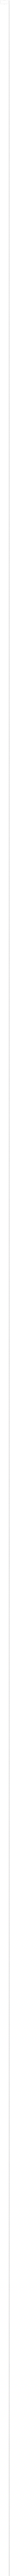

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Iterate through each unique stock using the index
for unique_id in Y_hat_insample.index.unique():
    stock_data = Y_hat_insample.loc[unique_id]  # Index-based selection

    # Plot true values and forecast for the current stock
    plt.plot(stock_data['ds'], stock_data['y'], label=f'True ({unique_id})')
    plt.plot(stock_data['ds'], stock_data['NHITS'], label=f'Forecast ({unique_id})', linestyle='--')  # Dashed line for forecast

    # Mark the train-test split for this stock (if applicable)
    # Assuming the split point is the same for all stocks
    if len(stock_data) > 12:
        plt.axvline(stock_data['ds'].iloc[-12], color='black', linestyle='dotted', alpha=0.7)  # Dotted line for split

# General plot formatting
plt.xlabel('Timestamp [t]')
plt.ylabel('Stock value')
plt.title('True vs. Forecast Values per Stock')
plt.grid(alpha=0.4)  # Less obtrusive grid

# Adjust legend to fit better
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

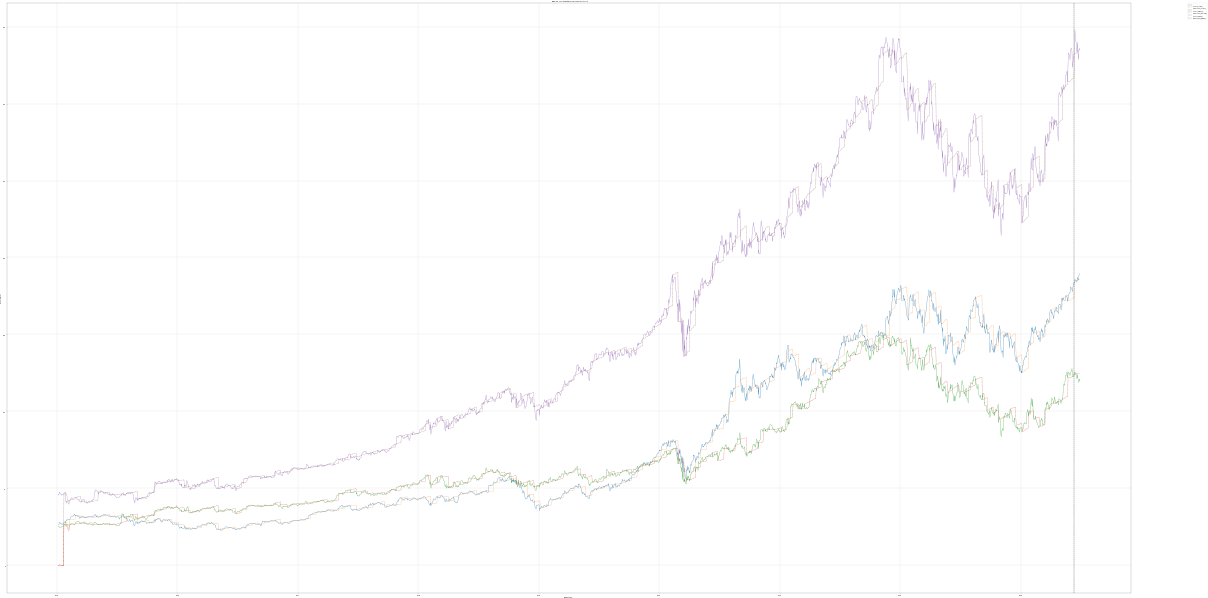

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) If Y_hat_insample has a MultiIndex, flatten it for easier filtering:
if isinstance(Y_hat_insample.index, pd.MultiIndex):
    # Reset index -> now "unique_id" and "ds" become columns
    Y_hat_insample = Y_hat_insample.reset_index()

# 2) Ensure we do have columns named exactly ["unique_id", "ds", "y", "NHITS", ...]
#    Adjust these next lines if your columns differ.
required_cols = {'unique_id', 'ds', 'y', 'NHITS'}
missing = required_cols - set(Y_hat_insample.columns)
if missing:
    raise ValueError(f"Missing columns {missing} in Y_hat_insample!")

# 3) For convenience, find all unique stocks:
unique_ids = Y_hat_insample['unique_id'].unique()

plt.figure(figsize=(100, 50))

for uid in unique_ids:
    # Filter rows for this stock
    stock_data = Y_hat_insample.loc[Y_hat_insample['unique_id'] == uid].copy()

    # Sort by ds so the lines plot in correct temporal order
    stock_data.sort_values('ds', inplace=True)

    # Plot the true values
    plt.plot(stock_data['ds'], stock_data['y'], label=f'True ({uid})')

    # Plot the forecast
    plt.plot(stock_data['ds'], stock_data['NHITS'],
             label=f'Forecast ({uid})', linestyle='--')

    # Mark the train-test split by the last 12 points, if you want:
    if len(stock_data) > 12:
        test_start = stock_data['ds'].iloc[-12]  # The first test date
        plt.axvline(test_start, color='black', linestyle='dotted', alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('Stock Value')
plt.title('True vs. Forecasted Values per Stock')
plt.grid(alpha=0.4)

# This will show a combined legend of all lines off to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
import matplotlib.pyplot as plt

# If you have many stocks, plotting them all in one figure can exceed the pixel limit.
# This approach creates subplots, one per stock, so each subplot remains a reasonable size.

unique_ids = Y_hat_insample.index.unique()
n_stocks = len(unique_ids)

# If you still have too many stocks, consider slicing: unique_ids = unique_ids[:10]
# or you can group them in bigger subplots (e.g. 2x2 or 3x3) instead of one row.

fig, axes = plt.subplots(n_stocks, 1, figsize=(10, 4 * n_stocks), sharex=True)

# If there's only 1 stock, axes won't be a list; make it a list for uniformity
if n_stocks == 1:
    axes = [axes]

for ax, uid in zip(axes, unique_ids):
    stock_data = Y_hat_insample.loc[uid]
    ax.plot(stock_data['ds'], stock_data['y'], label=f'True ({uid})')
    ax.plot(stock_data['ds'], stock_data['NHITS'], label=f'Forecast ({uid})', linestyle='--')
    # Train-test split marker
    if len(stock_data) > 12:
        ax.axvline(stock_data['ds'].iloc[-12], color='black', linestyle='dotted', alpha=0.7)
    ax.set_ylabel('Stock value')
    ax.grid(alpha=0.4)
    ax.legend(loc='upper left')

axes[-1].set_xlabel('Timestamp [t]')
fig.suptitle('True vs. Forecast per Stock', y=0.97)
fig.tight_layout()

plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a1e3fa524d0> (for post_execute):


ValueError: Image size of 120x307584 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 120x307584 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 120x307584 with 5158 Axes>

# Autoformer

In [42]:
from neuralforecast.models import Autoformer


# Try different hyperparmeters to improve accuracy.
models = [ Autoformer(h=horizon,
                    input_size=horizon,
                    max_steps=1000,
                    val_check_steps=100,
                    early_stop_patience_steps=3)
          ]

nf = NeuralForecast(models=models, freq='M')
nf.fit(df=hist, val_size=horizon)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 148 K  | train
7 | decoder       | Decoder       | 141 K  | train
--------------------------------------------------------


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<ipython-input-43-4f5a6ad922f6>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


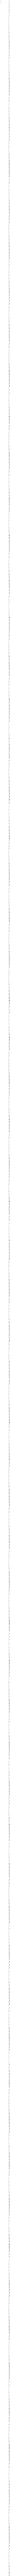

In [43]:
Y_hat_insample = nf.predict_insample(step_size=horizon)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Iterate through each unique stock using the index
for unique_id in Y_hat_insample.index.unique():
    stock_data = Y_hat_insample.loc[unique_id]  # Index-based selection

    # Plot true values and forecast for the current stock
    plt.plot(stock_data['ds'], stock_data['y'], label=f'True ({unique_id})')
    plt.plot(stock_data['ds'], stock_data['Autoformer'], label=f'Forecast ({unique_id})', linestyle='--')  # Dashed line for forecast

    # Mark the train-test split for this stock (if applicable)
    # Assuming the split point is the same for all stocks
    if len(stock_data) > 12:
        plt.axvline(stock_data['ds'].iloc[-12], color='black', linestyle='dotted', alpha=0.7)  # Dotted line for split

# General plot formatting
plt.xlabel('Timestamp [t]')
plt.ylabel('Stock value')
plt.title('True vs. Forecast Values per Stock with Autoformer')
plt.grid(alpha=0.4)  # Less obtrusive grid

# Adjust legend to fit better
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [44]:
Y_hat_insample = nf.predict_insample(step_size=horizon)

import matplotlib.pyplot as plt

# ↓ Lower the DPI to drastically reduce the pixel dimension
#   so the figure remains within Matplotlib's allowed range.
plt.figure(figsize=(10, 5), dpi=50)

# Iterate through each unique stock using the index
for unique_id in Y_hat_insample.index.unique():
    stock_data = Y_hat_insample.loc[unique_id]

    # Plot true values and forecast for the current stock
    plt.plot(
        stock_data['ds'],
        stock_data['y'],
        label=f'True ({unique_id})'
    )
    plt.plot(
        stock_data['ds'],
        stock_data['Autoformer'],
        label=f'Forecast ({unique_id})',
        linestyle='--'
    )

    # Optional: Mark the train-test split for this stock
    if len(stock_data) > 12:
        plt.axvline(
            x=stock_data['ds'].iloc[-12],
            color='black',
            linestyle='dotted',
            alpha=0.7
        )

# General plot formatting
plt.xlabel('Timestamp [t]')
plt.ylabel('Stock value')
plt.title('True vs. Forecast Values per Stock with Autoformer')
plt.grid(alpha=0.4)

# Adjust legend to fit better
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<ipython-input-44-2cf47acc1774>:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: Image size of 527x127830 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x250 with 1 Axes>

/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

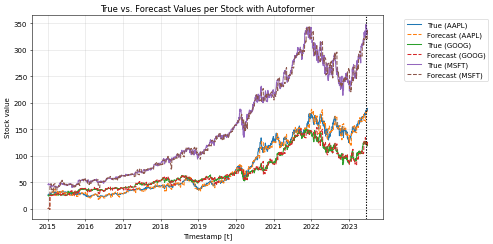

In [46]:
Y_hat_insample = nf.predict_insample(step_size=horizon)

# Change index to column so that the plotting functions work
Y_hat_insample = Y_hat_insample.reset_index()

import matplotlib.pyplot as plt

# ↓ Lower the DPI to drastically reduce the pixel dimension
#   so the figure remains within Matplotlib's allowed range.
plt.figure(figsize=(10, 5), dpi=50)

# Limit the number of unique ids to plot.
unique_ids = Y_hat_insample['unique_id'].unique()[:3]

# Iterate through each unique stock
for unique_id in unique_ids:
    stock_data = Y_hat_insample.loc[Y_hat_insample['unique_id'] == unique_id]

    # Plot true values and forecast for the current stock
    plt.plot(
        stock_data['ds'],
        stock_data['y'],
        label=f'True ({unique_id})'
    )
    plt.plot(
        stock_data['ds'],
        stock_data['Autoformer'],
        label=f'Forecast ({unique_id})',
        linestyle='--'
    )

    # Optional: Mark the train-test split for this stock
    if len(stock_data) > 12:
        plt.axvline(
            x=stock_data['ds'].iloc[-12],
            color='black',
            linestyle='dotted',
            alpha=0.7
        )

# General plot formatting
plt.xlabel('Timestamp [t]')
plt.ylabel('Stock value')
plt.title('True vs. Forecast Values per Stock with Autoformer')
plt.grid(alpha=0.4)

# Adjust legend to fit better
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Advanced forecasting with multiple models and tuning

In [47]:
!pip install statsforecast ray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 12.7 MB/s eta 0:00:00


In [48]:
from neuralforecast.auto import AutoNHITS, AutoAutoformer
from neuralforecast.losses.pytorch import MQLoss
from ray import tune


In [49]:
config_nhits = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "start_padding_enabled": True,
    "n_blocks": 5*[1],                                              # Length of input window
    "mlp_units": 5 * [[64, 64]],                                  # Length of input window
    "n_pool_kernel_size": tune.choice([5*[1], 5*[2], 5*[4],
                                      [8, 4, 2, 1, 1]]),            # MaxPooling Kernel size
    "n_freq_downsample": tune.choice([[8, 4, 2, 1, 1],
                                      [1, 1, 1, 1, 1]]),            # Interpolation expressivity ratios
    "learning_rate": tune.loguniform(1e-4, 1e-2),                   # Initial Learning rate
    "scaler_type": tune.choice([None]),                             # Scaler type
    "max_steps": tune.choice([1000]),                               # Max number of training iterations
    "batch_size": tune.choice([1, 4, 10]),                          # Number of series in batch
    "windows_batch_size": tune.choice([128, 256, 512]),             # Number of windows in batch
    "random_seed": tune.randint(1, 20),                             # Random seed
}
Autoformer(h=horizon,
                    input_size=horizon,
                    max_steps=1000,
                    val_check_steps=100,
                    early_stop_patience_steps=3)
config_autoformer = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "encoder_layers": tune.choice([2,4]),                     # Number of layers in Autoformer
    "learning_rate": tune.loguniform(1e-4, 1e-2),             # Initial Learning rate
    "scaler_type": tune.choice(['robust']),                   # Scaler type
    "max_steps": tune.choice([500, 1000]),                    # Max number of training iterations
    "batch_size": tune.choice([1, 4]),                        # Number of series in batch
    "random_seed": tune.randint(1, 20),                       # Random seed
}

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [50]:
nf = NeuralForecast(
    models=[
        AutoAutoformer(h=48, config=config_autoformer, loss=MQLoss(), num_samples=2),
        AutoNHITS(h=48, config=config_nhits, loss=MQLoss(), num_samples=5),
    ],
    freq='H'
)

In [51]:
nf.fit(df=hist)

2025-01-07 14:22:18,767	INFO worker.py:1821 -- Started a local Ray instance.
2025-01-07 14:22:21,079	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-01-07_14-22-15   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 2                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-01-07_14-22-15
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-01-07_14-22-15_419131_253/artifacts/2025-01-07_14-22-21/_train_tune_2025-01-07_14-22-15/driver_artifacts`


(pid=23277) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=23277) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=23277) 
(pid=23277) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=23277) This will raise in a future version.
(pid=23277) 
(pid=23277)   warnings.warn(msg, FutureWarning)
(_train_tune pid=23277) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=23277) Seed set to 12
(_train_tune pid=23277) GPU available: True (cuda), used: True
(_train_tune pid=23277) TPU available: False, using: 0 TPU cores
(_train_tune pid=23277) HPU available: False, using: 0 HPUs
(_train_tune pid=23277) 2025-01-07 14:22:29.335760: E external/local_xla/xla/stream_executor/cuda/cud

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s, v_num=0, train_loss_step=0.644, train_loss_epoch=0.627]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s, v_num=0, train_loss_step=0.592, train_loss_epoch=0.610, valid_loss=4.580]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=23277) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s, v_num=0, train_loss_step=0.606, train_loss_epoch=0.611, valid_loss=4.110]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=23277) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 28.82it/s]
(_train_tune pid=23277) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s, v_num=0, train_loss_step=0.593, train_loss_epoch=0.593, valid_loss=4.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|█████████

(_train_tune pid=23277) `Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s, v_num=0, train_loss_step=0.580, train_loss_epoch=0.566, valid_loss=4.580]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s, v_num=0, train_loss_step=0.580, train_loss_epoch=0.580, valid_loss=4.300]


(pid=26992) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=26992) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=26992) 
(pid=26992) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=26992) This will raise in a future version.
(pid=26992) 
(pid=26992)   warnings.warn(msg, FutureWarning)
(_train_tune pid=26992) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=26992) Seed set to 8
(_train_tune pid=26992) GPU available: True (cuda), used: True
(_train_tune pid=26992) TPU available: False, using: 0 TPU cores
(_train_tune pid=26992) HPU available: False, using: 0 HPUs
(_train_tune pid=26992) 2025-01-07 14:37:02.254333: E external/local_xla/xla/stream_executor/cuda/cuda

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 33:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.699, train_loss_epoch=0.651]
(_train_tune pid=26992) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=26992) 
Epoch 66:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.655, train_loss_epoch=0.638, valid_loss=5.110]
(_train_tune pid=26992) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=26992) 
Epoch 99: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s, v_num=0, train_loss_step=0.603, train_loss_epoch=0.592, valid_loss=5.100]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 133:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.551, train_loss_epoch=0.552, valid_loss=5.230]
(_train_tune pid=26992) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|     

(_train_tune pid=26992) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=26992) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 333:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.401, train_loss_epoch=0.401, valid_loss=9.030]


2025-01-07 14:51:35,357	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-01-07_14-22-15' in 0.0072s.
INFO:lightning_fabric.utilities.seed:Seed set to 12
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MQLoss        | 5      | eval 
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbeddi

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-01-07_15-06-01   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 5                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-01-07_15-06-01
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-01-07_14-22-15_419131_253/artifacts/2025-01-07_15-06-01/_train_tune_2025-01-07_15-06-01/driver_artifacts`


(pid=34407) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=34407) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=34407) 
(pid=34407) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=34407) This will raise in a future version.
(pid=34407) 
(pid=34407)   warnings.warn(msg, FutureWarning)
(_train_tune pid=34407) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=34407) Seed set to 15
(_train_tune pid=34407) GPU available: True (cuda), used: True
(_train_tune pid=34407) TPU available: False, using: 0 TPU cores
(_train_tune pid=34407) HPU available: False, using: 0 HPUs
(_train_tune pid=34407) 2025-01-07 15:06:10.106542: E external/local_xla/xla/stream_executor/cuda/cud

Epoch 33:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.420]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=34407) 
Epoch 66:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.896, train_loss_epoch=1.350, valid_loss=3.380]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 98.46it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.380, valid_loss=3.740]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 133:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.906, train_loss_epoch=1.320, valid_loss=3.830]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 166:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.908, train_loss_epoch=1.360, valid_loss=3.340]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=

(_train_tune pid=34407) `Trainer.fit` stopped: `max_steps=1000` reached.
(pid=34562) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=34562) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=34562) 
(pid=34562) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=34562) This will raise in a future version.
(pid=34562) 
(pid=34562)   warnings.warn(msg, FutureWarning)
(_train_tune pid=34562) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=34562) Seed set to 19
(_train_tune pid=34562) GPU available: True (cuda), used: True
(_train_tune pid=34562) TPU available: False, using: 0 TPU cores
(_train_tune pid=34562) HPU available: False, using: 0 HPUs
(_train_tune pid=34562) 2025

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 96.50it/s, v_num=0, train_loss_step=1.490, train_loss_epoch=1.580]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 224.85it/s]
(_train_tune pid=34562) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 89.05it/s, v_num=0, train_loss_step=1.510, train_loss_epoch=1.150, valid_loss=3.400]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 93.78it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.480, valid_loss=3.180]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 78.95it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.280, valid_loss=3.570]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 93.44it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.270, valid_loss=3.250]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:0

(_train_tune pid=34562) `Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 66.54it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.350, valid_loss=3.390]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 26.26it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.330, valid_loss=3.440]


(pid=34719) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=34719) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=34719) 
(pid=34719) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=34719) This will raise in a future version.
(pid=34719) 
(pid=34719)   warnings.warn(msg, FutureWarning)
(_train_tune pid=34719) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=34719) Seed set to 5
(_train_tune pid=34719) GPU available: True (cuda), used: True
(_train_tune pid=34719) TPU available: False, using: 0 TPU cores
(_train_tune pid=34719) HPU available: False, using: 0 HPUs
(_train_tune pid=34719) 2025-01-07 15:07:01.420302: E external/local_xla/xla/stream_executor/cuda/cuda

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 36.95it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=1.290]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 85.09it/s, v_num=0, train_loss_step=1.420, train_loss_epoch=1.380, valid_loss=3.420]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 83.36it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.420, valid_loss=3.330]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 74.08it/s, v_num=0, train_loss_step=1.290, train_loss_epoch=1.310, valid_loss=3.460]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 83.99it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=1.280, valid_loss=3.460]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 87.83it/s, v_num=0, train_loss_step=1

(_train_tune pid=34719) `Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 56.59it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.340, valid_loss=3.410]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 22.13it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.430, valid_loss=3.360]


(pid=34886) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=34886) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=34886) 
(pid=34886) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=34886) This will raise in a future version.
(pid=34886) 
(pid=34886)   warnings.warn(msg, FutureWarning)
(_train_tune pid=34886) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=34886) Seed set to 13
(_train_tune pid=34886) GPU available: True (cuda), used: True
(_train_tune pid=34886) TPU available: False, using: 0 TPU cores
(_train_tune pid=34886) HPU available: False, using: 0 HPUs
(_train_tune pid=34886) 2025-01-07 15:07:29.622233: E external/local_xla/xla/stream_executor/cuda/cud

Epoch 33:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.948, train_loss_epoch=1.330]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=34886) 
Epoch 66:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.840, train_loss_epoch=1.360, valid_loss=3.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 84.77it/s, v_num=0, train_loss_step=0.936, train_loss_epoch=1.340, valid_loss=3.510]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 133:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.790, train_loss_epoch=1.330, valid_loss=3.430]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 166:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.690, train_loss_epoch=1.330, valid_loss=3.380]
(_train_tune pid=34886) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 3/3 [00:00<00:00, 79.48it/s

(_train_tune pid=34886) `Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 333:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.998, train_loss_epoch=1.330, valid_loss=3.440]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 333:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.850, train_loss_epoch=1.850, valid_loss=3.440]


(pid=35046) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=35046) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=35046) 
(pid=35046) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=35046) This will raise in a future version.
(pid=35046) 
(pid=35046)   warnings.warn(msg, FutureWarning)
(_train_tune pid=35046) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=35046) Seed set to 6
(_train_tune pid=35046) GPU available: True (cuda), used: True
(_train_tune pid=35046) TPU available: False, using: 0 TPU cores
(_train_tune pid=35046) HPU available: False, using: 0 HPUs
(_train_tune pid=35046) 2025-01-07 15:07:56.865609: E external/local_xla/xla/stream_executor/cuda/cuda

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 51.18it/s, v_num=0, train_loss_step=1.680, train_loss_epoch=1.430]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 59.87it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.320, valid_loss=3.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 68.83it/s, v_num=0, train_loss_step=1.170, train_loss_epoch=1.240, valid_loss=3.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 93.36it/s, v_num=0, train_loss_step=1.300, train_loss_epoch=1.450, valid_loss=3.300]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 74.45it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.240, valid_loss=3.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 92.35it/s, v_num=0, train_loss_step=1.260, train_loss_epoch=1.400, valid_loss=3.420]
Val

2025-01-07 15:08:14,947	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-01-07_15-06-01' in 0.0089s.
INFO:lightning_fabric.utilities.seed:Seed set to 6


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 92.02it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.870, valid_loss=3.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 229.75it/s]



(_train_tune pid=35046) `Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 87.9 K | train
-------------------------------------------------------
87.9 K    Trainable params
5         Non-trainable params
87.9 K    Total params
0.352     Total estimated model params size (MB)
39        Modules in train mode
1         Modules in eval m

(_train_tune pid=35046) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 33.19it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.620, valid_loss=3.300]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


In [52]:
fcst_df = nf.predict()
fcst_df.columns = fcst_df.columns.str.replace('-median', '')
fcst_df.head()

/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,AutoAutoformer,AutoAutoformer-lo-90,AutoAutoformer-lo-80,AutoAutoformer-hi-80,AutoAutoformer-hi-90,AutoNHITS,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90
0,AAPL,2023-06-29 01:00:00,194.344788,162.954208,170.510330,213.713638,221.722443,189.294540,183.638733,184.938278,193.913589,195.110458
1,AAPL,2023-06-29 02:00:00,190.753418,161.003357,168.613190,210.286987,218.736923,189.211288,182.969284,184.507690,194.601181,196.090164
2,AAPL,2023-06-29 03:00:00,189.815857,162.993790,169.135254,209.881866,218.988312,189.558350,180.791367,183.112106,196.135529,198.169556
3,AAPL,2023-06-29 04:00:00,191.203842,163.100540,170.042480,211.652603,220.088303,190.119965,179.392242,181.910828,197.242813,199.872818
4,AAPL,2023-06-29 05:00:00,192.228149,163.605835,170.772598,211.368637,219.636322,190.234421,179.220032,181.768265,197.945587,201.140610


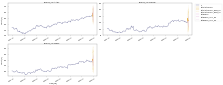

In [53]:
from statsforecast import StatsForecast
StatsForecast.plot(hist, fcst_df, engine='matplotlib', max_insample_length=48 * 3, level=[80, 90])

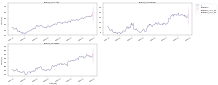

In [54]:
StatsForecast.plot(hist, fcst_df, models=["AutoNHITS"], engine='matplotlib', max_insample_length=48 * 3, level=[80, 90])

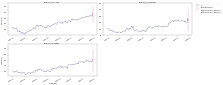

In [55]:
StatsForecast.plot(hist, fcst_df, models=["AutoAutoformer"], engine='matplotlib', max_insample_length=48 * 3, level=[80, 90])